# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm


In [ ]:
get_ipython().run_line_magic('matplotlib', 'auto')

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [ ]:
athletes = pd.read_csv("athletes.csv")

In [ ]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [ ]:
# Sua análise começa aqui.
athletes.head()

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

5.681722541339695e-07


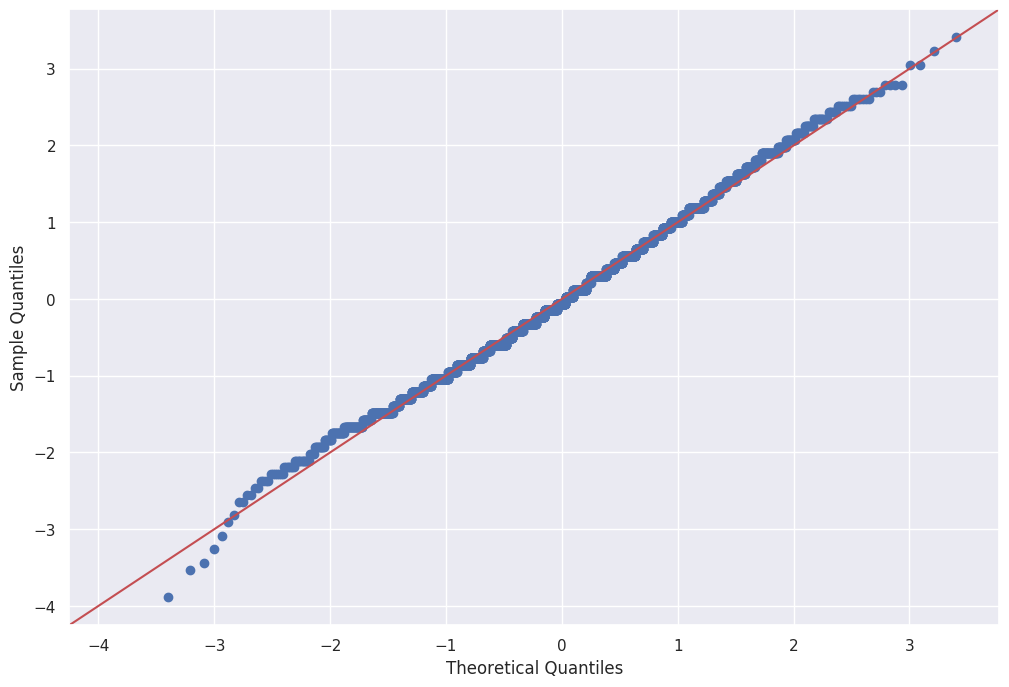

In [51]:
sample = get_sample(athletes, 'height', 3000)
stat, p = sct.shapiro(sample)

alpha = 0.05

plt.hist(sample, bins=25)

sm.qqplot(sct.norm.rvs(loc=10, scale=4, size=1000), fit=True, line='45')


In [53]:
def q1():
    # Retorne aqui o resultado da questão 1.
    sample = get_sample(athletes, 'height', 3000)
    stat, p = sct.shapiro(sample)

    alpha = 0.05

    return p > alpha

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [52]:
sample = get_sample(athletes, 'height', n=3000)
stat, p = sct.jarque_bera(sample)

print(p)

alpha = 0.05

p > alpha

0.001478366424594868


False

In [54]:
def q2():
    # Retorne aqui o resultado da questão 2.
    sample = get_sample(athletes, 'height', 3000)
    stat, p = sct.jarque_bera(sample)

    alpha = 0.05

    return p > alpha
    

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [65]:


# Retorne aqui o resultado da questão 2.
sample = get_sample(athletes, 'weight', 3000)

#plt.hist(sample, bins=25)

stat, p = sct.jarque_bera(sample)

alpha = 0.05
print(p)
p > alpha
#sm.qqplot(sample, fit=True, line="45")
sns.boxplot(sample);



0.0


In [61]:
def q3():
    # Retorne aqui o resultado da questão 3.
    sample = get_sample(athletes, 'weight', 3000)

    stat, p = sct.jarque_bera(sample)

    alpha = 0.05
    
    return p > alpha

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [ ]:
def q4():
    # Retorne aqui o resultado da questão 4.
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [66]:
def q5():
    # Retorne aqui o resultado da questão 5.
    bra = athletes[athletes['nationality']=='BRA']
    can = athletes[athletes['nationality']=='CAN']
    stats, p = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')
    alpha = 0.05
    
    return p > alpha

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [68]:
def q6():
    # Retorne aqui o resultado da questão 6.
    bra = athletes[athletes['nationality']=='BRA']
    can = athletes[athletes['nationality']=='CAN']
    stats, p = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')
    
    alpha = 0.05

    return p > alpha

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [ ]:
def q7():
    # Retorne aqui o resultado da questão 7.
    usa = athletes[athletes['nationality']=='USA']
    can = athletes[athletes['nationality']=='CAN']
    stats, p = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
    return round(p_usaxcan,p)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?